<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_08_nn_keras__V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



| Función de activación | Ventajas | Desventajas |
| --------------------- | -------- | ----------- |
| Lineal | Simple y rápida de calcular | Le falta introducir no linealidad, no limita el rango de salida |
| Sigmoide | Mapea la salida al rango (0, 1), útil para clasificación binaria | Se satura fácilmente, tiene gradientes pequeños, no tiene media cero |
| Tangente hiperbólica | Mapea la salida al rango (-1, 1), tiene media cero, es más fuerte que la sigmoide | Se satura fácilmente, tiene gradientes pequeños |
| ReLU | Introduce no linealidad, tiene gradientes grandes, es rápida de calcular | Puede morir si la entrada es negativa, no tiene media cero |


# Keras: https://keras.io/api/layers/activations/

Keras es una bilbioteca con librerias de código abierto para entrenar modelos de deep learning DL que puede ejecutarse en TensorFlow. Keras permite construir bloque de arquitectura de la redes neuronales, y permite construir desde un perceptron hasta redes neuronales convolucionales  y recurrentes de una manera amigable con el usuario.


# Funciones de activación

Tipos de funciones de activación:

## Lineal:

Una transformación lineal, la cual se muestra en la siguiente figura, consiste básicamente, en la función identidad. En estra transformación, la variable dependiente tiene una relación directa y proporcional con la variable independiente. En términos prácticos, lo anterior significa que una función de activación lineal pasa la señal sin realizar un cambio sobre esta. Este el típo de activación que se usa en la capa de entrada de las redes neuronales.


## Sigmoide:
Como todas las transformaciones logísticas, las sigmoides puede reducir la cantidad de valores extremos o outliers en los datos sin eliminarlos. En la siguiente figura se ilustra dicha función sigmoide:

Una función sigmoide convierte una variable independiente de rango infinito en probabilidades con un rango entre 0 y 1. La mayoria de las salidas serán cercanas a 0 o 1, que corresponden a zonas de saturación.

La función de activación sigmoide devuelve una probabilidad independiente para cada clase.



##  Tanh
Corresponde a una función trigonométrica hiperbólica donde el rango de salida de tanh varía entre -1 y 1, note la diferencia con la función sigmoide. La ventaja de tanh es puede tratar los números negativos de forma más eficiente que la función sigmoide.


## ReLU: Rectified Linear Unit (Unidad Rectificadad Lineal)
La unidad rectificada lineal es una trasformación más intersante que activa un nodo solo si la entrada se encuentra por encima de cierta cantidad. Si la entrada está por debajo de zero, la salida es cero, pero si la entrada alcanza un valor umbral, la salida tiene una relación lineal con la variable dependiente.

Las funciones de activaciones ReLU representan actualmente el estado de arte en la aplicación de funciones de activación, ya que han demostrado un buen desempeño en diferentes situaciones. Dado que el gradiente de la ReLU es cero o constante, permite evitar el problema del desvanecimiento del gradiente. Las funciones de activación ReLu han demostrado un mejor entrenamiento en la práctica que las funciones de activación sigmoidea.

Las funciones de activación ReLU se usan, normalmente, en las capas ocultas.

Existen mas funciones de activación, no obstante, nos centraremos a continuación solo en una más. Esta función de activación es usada en la capa de salida de la clasificación multiclase mediante una red neuronal. Es conocida como Softmax.


## Softmax
La función de activación Softmax representa una generalización de la regresión logística en el sentido que puede ser apllicada a un conjunto continuos de datos (en lugar de una clasificación binaria) y puede contener múltiples fronteras de desición. Esta función maneja sistemas multinomiales para el etiquetado. Softmax es una función que normalmente se usa en la capa de salida de un clasificador.

La función de activación Softmax devuelve la distribución de probablilidades de clases mutuamente excluyentes.

Consideremos el siguiente ejemplo en donde se ilustra, entre otra cosas la definición de la función SoftMax:

$S(y_i)=\frac{e^{y_i}}{\sum e^{y_i}}$


En deep learning, el térno capa logit se usa para la última capa de neuronas de la red neuronal para el problema de clasificación que produce unos valores de predicción "crudos" de valores reales que varian en el intervalo . En concreto, las cantidades logits son los puntajes crudos de la ultima capa de la red neuronal, antes de que se les aplique la activación.


Ref: https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S07_Funciones_Activacion_Arquitectura_Red.ipynb

In [1]:
import numpy as np
from tensorflow import keras


Las funciones de activacion son capas tambien, hay capas de neuronas, y hay capas con funciones de activacion, tambien puede haber capas de neuronas con funciones de activacion en la misma capa, entonces no toca crear una nueva capa de activacion ejemplo:

modelA.add(keras.layers.Dense(32, input_shape=(16,)))
modelA.add(keras.layers.Activation('relu'))#  Capa activación

Lo anterior es entonces 2 capas, una capa densa de 32 neuronas densas con entradas de 16 valores, y otra capa con funcion activacion relu

modelB.add(keras.layers.Dense(64, activation='tanh')) # D: esto

Este por otro lado es una capa densa de 64 neuronas que tiene tambien una funcion de activacion, en este caso la funcion es tanh

In [2]:
# 1: A través de una capa medidante el método Activación:
modelA = keras.models.Sequential()
"""
Aquí se crea un modelo secuencial (Sequential) de Keras, lo cual significa que las capas se añadirán una tras otra en orden,
formando una arquitectura lineal.
"""
modelA.add(keras.layers.Dense(32, input_shape=(16,)))
"""
es una capa completamente conectada con 32 neuronas y Define que la entrada al modelo debe tener 16 características
(es decir, cada entrada es un vector de 16 valores).

Una capa densa (o fully connected layer) es un tipo de capa en las redes neuronales donde:
Cada neurona de la capa está conectada a todas las neuronas de la capa anterior.
"""
modelA.add(keras.layers.Activation('relu'))#  Capa activación
"""
Añade una capa de activación que aplica la función ReLU (Rectified Linear Unit).
"""
modelA.add(keras.layers.Dense(64))
"""
Es otra capa completamente conectada, esta vez con 64 neuronas.
Aquí no se especifica el input_shape porque Keras lo infiere automáticamente de la salida de la capa anterior.
"""
modelA.add(keras.layers.Activation('tanh'))#  Capa activación
modelA.summary()
"""
Muestra un resumen del modelo que incluye:
Las capas que tiene el modelo (con sus nombres y tipos).
La cantidad de parámetros entrenables de cada capa (weights + biases).

Los pesos y sesgos son los parámetros ajustados durante el entrenamiento para que la red
sea capaz de aprender patrones útiles de los datos
"""

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,656 (10.38 KB)

 Trainable params: 2,656 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

'\nMuestra un resumen del modelo que incluye:\nLas capas que tiene el modelo (con sus nombres y tipos).\nLa cantidad de parámetros entrenables de cada capa (weights + biases).\n\nLos pesos y sesgos son los parámetros ajustados durante el entrenamiento para que la red\nsea capaz de aprender patrones útiles de los datos\n'

el 544 de la primera capa viene dado por:

Si una capa tiene 16 entradas y 32 neuronas:  \\
Cada neurona tendrá 16 pesos (w
1,w2,...,w16).Cada neurona tendrá 1 sesgo (b (bias)).Total de parámetros entrenables: (16+1)⋅32=544.

Para la segunda capa, es las entradas, y como la primera capa tiene 32 neuronas, estas son las entradas, mas cada neurona que tiene 1 bias, y esto multiplicado por el numero de neuronas de la segunda capa, esto nos da entonces (32 + 1) * 64 = 2112

In [3]:
# 2: Mediante el argumento activation
modelB = keras.models.Sequential() # D: crea el modelo secuencial
modelB.add(keras.layers.Dense(32, input_shape=(16,))) # D: La primera capa densa con sus respectivas entradas
modelB.add(keras.layers.Activation('relu'))#  Capa activación D: para la primera capa
modelB.add(keras.layers.Dense(64, activation='tanh'))
"""
La activación tanh se aplica inmediatamente dentro de esta capa, lo que significa que no necesitas una capa Activation separada.
"""
modelB.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,656 (10.38 KB)

 Trainable params: 2,656 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 3: Mediante una función de Tensor-flow por elementos.
modelC = keras.models.Sequential() # D: crea el modelo secuencial
modelC.add(keras.layers.Dense(32, activation='relu', input_shape=(16,)))
"""
crea la capa densa con 32 neuronas que ademas tiene una funcion de activacion relu, y tiene 16 entradas
"""
modelC.add(keras.layers.Dense(64, activation='tanh'))
"""
crea la capa densa con 64 neuronas que ademas tiene una funcion de activacion tanh,
y ya keria sabe las entradas de la capa anterior
"""
modelC.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,656 (10.38 KB)

 Trainable params: 2,656 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

Text(0.5, 1.0, 'Función ReLU')

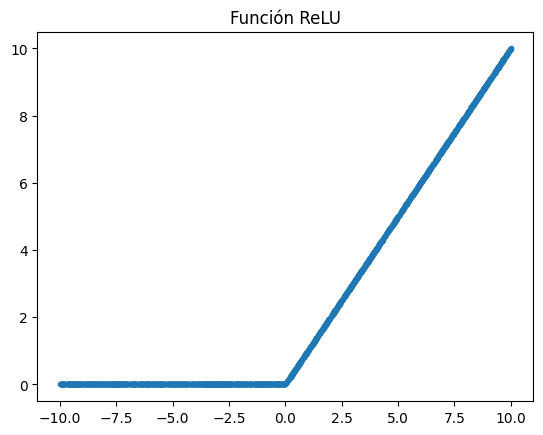

In [5]:
# Vamos a graficar las funciones de activación y modificar los parámetros que las definen
# Encuentran los parámetros en https://keras.io/api/layers/activations/
# Relu
import matplotlib.pyplot as plt
x=np.random.uniform(low=-10.0, high=10, size=(2000,))
y=keras.activations.relu(x, negative_slope=0, max_value=None, threshold=0)
"""
Parametros:
negative_slope: Este parámetro controla la pendiente de la función para valores de entrada negativos.
Por defecto, se establece en 0, lo que significa que la función mostrará 0 para cualquier
valor de entrada menor que 0 (el comportamiento estándar de ReLU).

valor_máx: Este parámetro establece un límite superior para la salida de la función ReLU.
Si la salida supera el valor_máximo, se recorta a ese valor. Por defecto, se establece en None, lo que significa que no hay límite superior en la salida. Este parámetro puede ser útil para controlar el rango de activaciones en tu red.

threshold: This parameter allows you to shift the ReLU function horizontally.
Instead of activating at 0, it will activate at the value specified by threshold. By default, it is set to 0.
"""
plt.plot(x,y,'.')
plt.title('Función ReLU')

Text(0.5, 1.0, 'Función tanh')

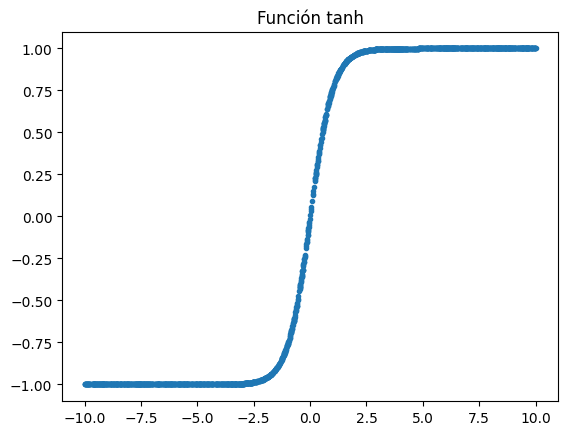

In [6]:
# tanh
y=keras.activations.tanh(x)
plt.plot(x,y,'.')
plt.title('Función tanh')

Text(0.5, 1.0, 'Función sigmoid')

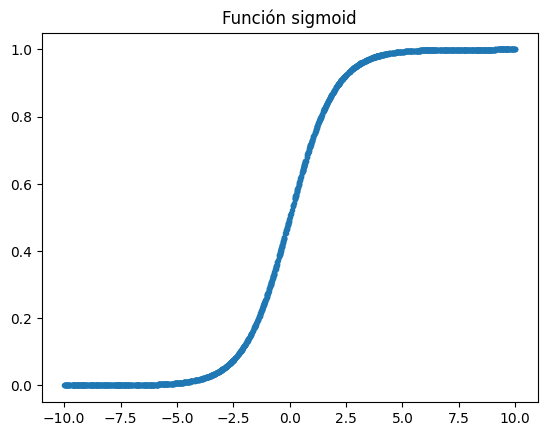

In [7]:
#sigmoid
y=keras.activations.sigmoid(x)
plt.plot(x,y,'.')
plt.title('Función sigmoid')

Text(0.5, 1.0, 'Función elu')

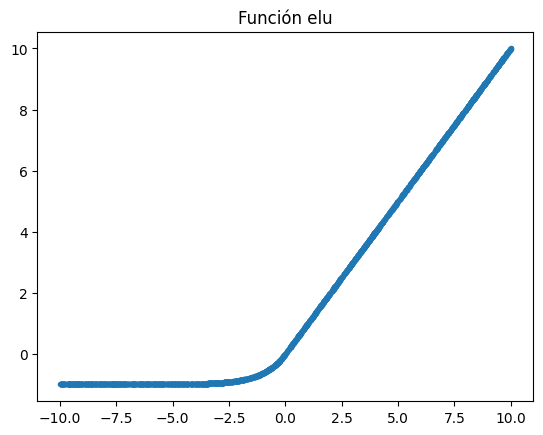

In [8]:
# elu
y=keras.activations.elu(x, alpha=1.0)
plt.plot(x,y,'.')
plt.title('Función elu')

Text(0.5, 1.0, 'Función Exponential')

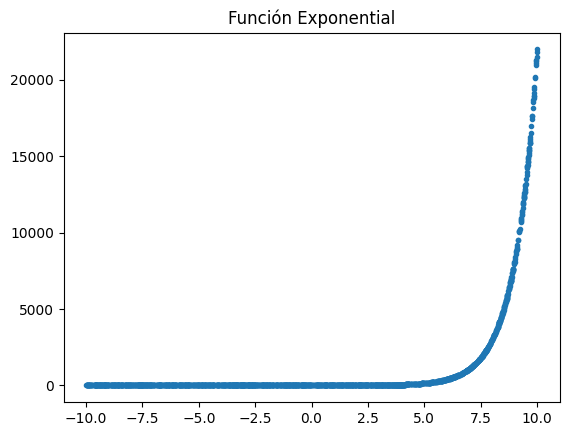

In [9]:
# Exponential
y=keras.activations.exponential(x)
plt.plot(x,y,'.')
plt.title('Función Exponential')

Text(0.5, 1.0, 'Función Selu')

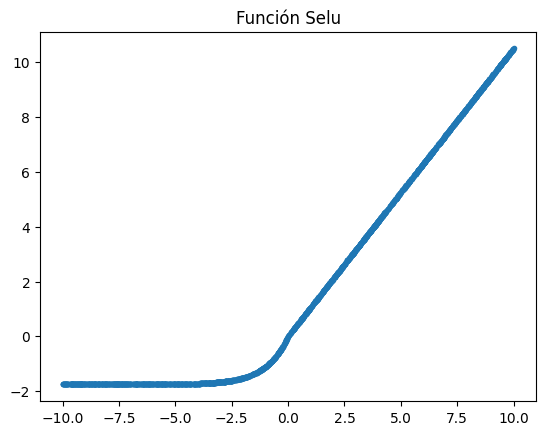

In [10]:
# Selu
y=keras.activations.selu(x)
plt.plot(x,y,'.')
plt.title('Función Selu')

Text(0.5, 1.0, 'Función Linear')

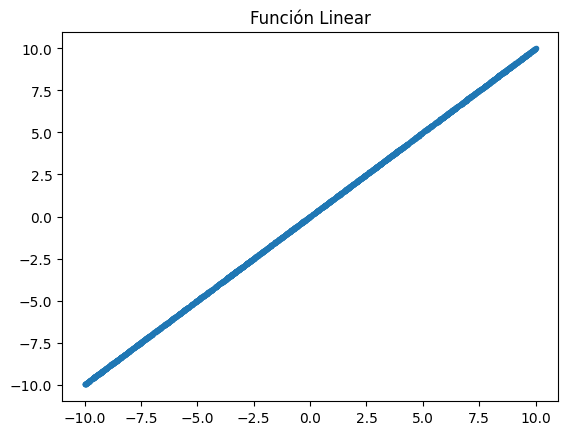

In [11]:
# Linear
y=keras.activations.linear(x)
plt.plot(x,y,'.')
plt.title('Función Linear')

Text(0.5, 1.0, 'Función softplus')

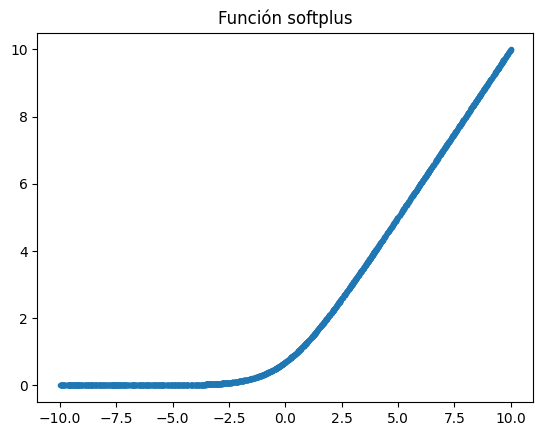

In [12]:
y=keras.activations.softplus(x)
plt.plot(x,y,'.')
plt.title('Función softplus')

Text(0.5, 1.0, 'Función softsign')

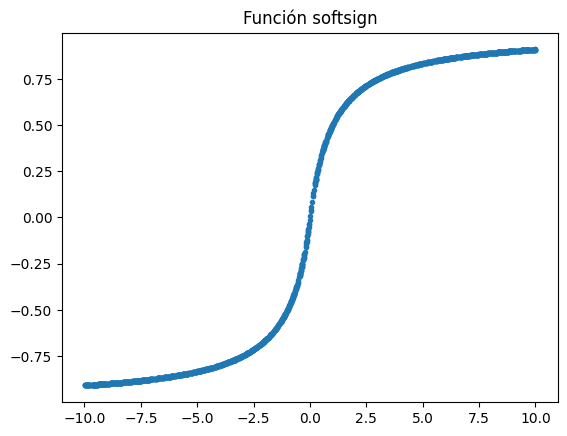

In [13]:
y=keras.activations.softsign(x)
plt.plot(x,y,'.')
plt.title('Función softsign')

# Arquitectura y funcionalidad de la Redes neuronales secuenciales:

De las funciones de activación habladas en la clase anterior podemos advertir dos características que deben poseer una red neuronal:

Las funciones de activación de las capas ocultas deben ser funciones de activación no lineales, con el fín de que la red actue como un aproximador universal a una función.

La función de activación de la capa de salida determina el tipo de clasificación/regresión del problema que se pretende solucionar.
Como regla general, se tiene que la función de activación de las capas ocultas puede ser definida como una función ReLU y, dependiendo del problema, podemos definir la función de activación de la capa de salida como:

- Función de activación sigmoide: si el problema de clasificación es binario.
- Función de activación Softmax: si el problema de clasificación es multiclase.
- Función de activación lineal: si el problema se trata de una regresión.

En resumen, en la siguiente figura se ilustran la arquitectura de red de los problemas que pueden presentarse en la clasificación/regresión usando una red neuronal secuencial y las funciones de activación definidas en las capas que la componen.

In [14]:
# https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S08_Problemas_FFNN.ipynb
# https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S11_DNN.ipynb

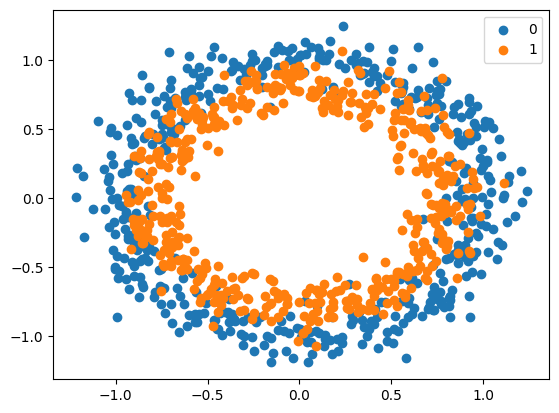

In [15]:
# generación de círculos
# Algunas librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.legend()
plt.show()

In [16]:
# Creación del modelo
def build_model2(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=2, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

#https://developers.google.com/machine-learning/crash-course/classification/accuracy#:~:text=Accuracy%20is%20one%20metric%20for,predictions%20Total%20number%20of%20predictions

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.4953 - loss: 0.6986 - val_accuracy: 0.5140 - val_loss: 0.6871
Epoch 2/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4622 - loss: 0.7012 - val_accuracy: 0.5120 - val_loss: 0.6868
Epoch 3/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5229 - loss: 0.6905 - val_accuracy: 0.5280 - val_loss: 0.6865
Epoch 4/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4885 - loss: 0.6984 - val_accuracy: 0.5360 - val_loss: 0.6863
Epoch 5/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5259 - loss: 0.6901 - val_accuracy: 0.5380 - val_loss: 0.6862
Epoch 6/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5305 - loss: 0.6926 - val_accuracy: 0.5440 - val_loss: 0.6860
Epoch 7/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5228 - loss: 0.6887 - val_accuracy: 0.5620 - val_loss: 0.6859
Epoch 8/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4742 - loss: 0.6952 - val_accuracy: 0.55

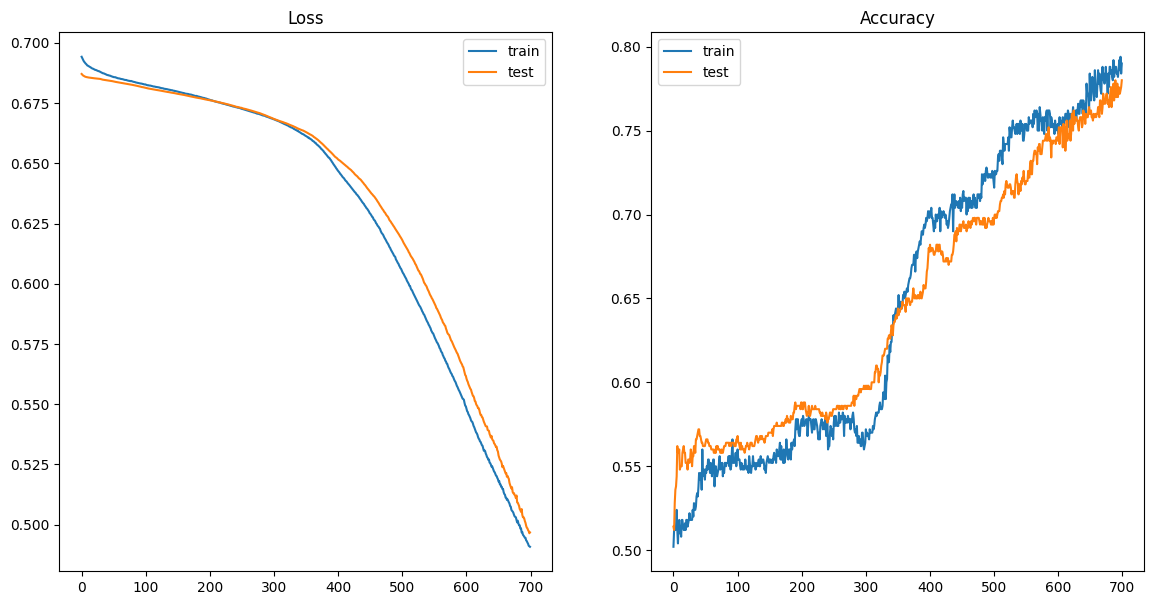

In [17]:
# binary cross entropy:
keras.backend.clear_session()
# Preprocesado de los datos
n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
model = build_model2()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=700, verbose=1)
#Una epochs en el aprendizaje automático significa un paso completo del conjunto de datos de entrenamiento a través del algoritmo
# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [18]:
pred_probabilities = model.predict(test_X)
pred_classes = (pred_probabilities >= 0.5).astype(int)
#

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [19]:
for i in range(10):
    print(f"Punto: {test_X[i]}, Probabilidad: {pred_probabilities[i][0]:.3f}, Clase Predicha: {pred_classes[i][0]}, Clase Real: {test_y[i]}")

Punto: [-0.69796378 -0.49590001], Probabilidad: 0.577, Clase Predicha: 1, Clase Real: 1
Punto: [-0.78029488  0.70225382], Probabilidad: 0.193, Clase Predicha: 0, Clase Real: 0
Punto: [0.8652267  0.41124686], Probabilidad: 0.332, Clase Predicha: 0, Clase Real: 0
Punto: [0.88331309 0.3840398 ], Probabilidad: 0.342, Clase Predicha: 0, Clase Real: 0
Punto: [-0.50842085 -0.76049894], Probabilidad: 0.523, Clase Predicha: 1, Clase Real: 0
Punto: [-0.01141155 -0.94185848], Probabilidad: 0.383, Clase Predicha: 0, Clase Real: 0
Punto: [-0.88235724 -0.37418938], Probabilidad: 0.421, Clase Predicha: 0, Clase Real: 0
Punto: [-0.69236134 -0.35520862], Probabilidad: 0.706, Clase Predicha: 1, Clase Real: 1
Punto: [ 0.79720437 -0.37345888], Probabilidad: 0.623, Clase Predicha: 1, Clase Real: 1
Punto: [0.85462366 0.12548115], Probabilidad: 0.592, Clase Predicha: 1, Clase Real: 0


# Laboratorio
1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [20]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


In [21]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape


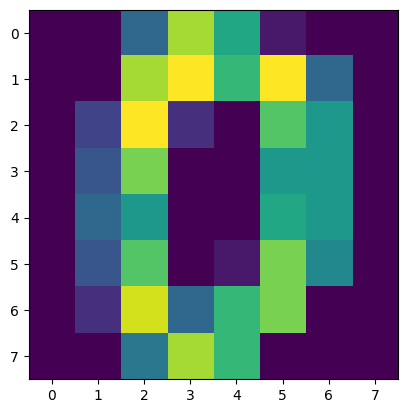

In [22]:
plt.imshow(X[0].reshape(8, 8)) # esto es un digito

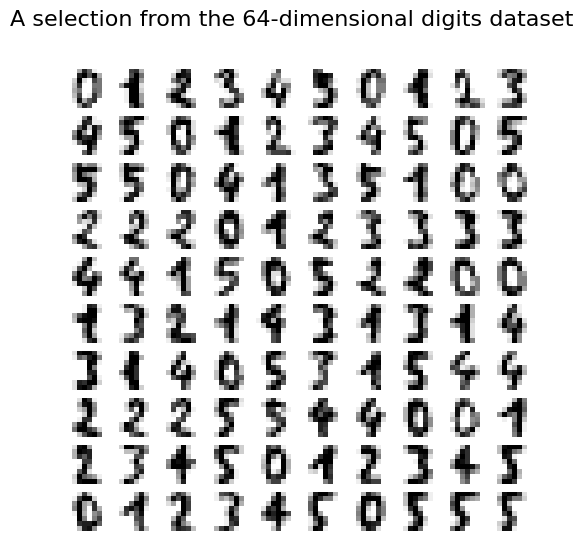

In [23]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#usar como funcion de activacion final softmax y la capa de salida debe tener 10 neuronas, una para cada clase de digito, y para las capas ocultas, usar relu normal.

1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

In [24]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

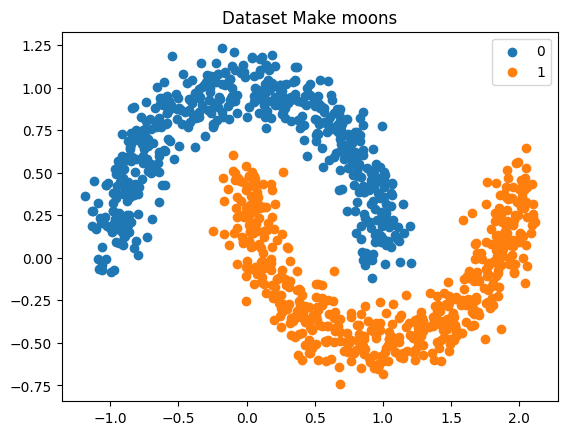

In [25]:
# Genera 1000 muestras con un nivel de ruido de 0.1
X, y = make_moons(n_samples=1000, noise=0.1)
# X: coordenadas x, y
# y: si son del 1 o del dos

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.title('Dataset Make moons')
plt.legend()
plt.show()

In [26]:
# Creación del modelo
def model_make_moons(activation = 'sigmoid', loss='binary_crossentropy'):
  """
  activation = 'sigmoid' es la funcion de activacion de la capa de salida
  loss='binary_crossentropy' es la funcion de perdida
  """
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(10, input_dim=2, activation='relu'))
  # la entrada son dos caracteristicas pues queremos ver a que pertenecen
  model.add(keras.layers.Dense(10, activation='relu'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

In [27]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((500, 2), (500,), (500, 2), (500,))

Epoch 1/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6461 - loss: 0.5926 - val_accuracy: 0.6540 - val_loss: 0.6010
Epoch 2/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6955 - loss: 0.5691 - val_accuracy: 0.7240 - val_loss: 0.5874
Epoch 3/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7470 - loss: 0.5740 - val_accuracy: 0.7620 - val_loss: 0.5744
Epoch 4/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7778 - loss: 0.5602 - val_accuracy: 0.7720 - val_loss: 0.5616
Epoch 5/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8172 - loss: 0.5365 - val_accuracy: 0.7780 - val_loss: 0.5488
Epoch 6/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8184 - loss: 0.5169 - val_accuracy: 0.7880 - val_loss: 0.5363
Epoch 7/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8252 - loss: 0.5140 - val_accuracy: 0.7980 - val_loss: 0.5244
Epoch 8/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8299 - loss: 0.5075 - val_accuracy: 0.8080 - 

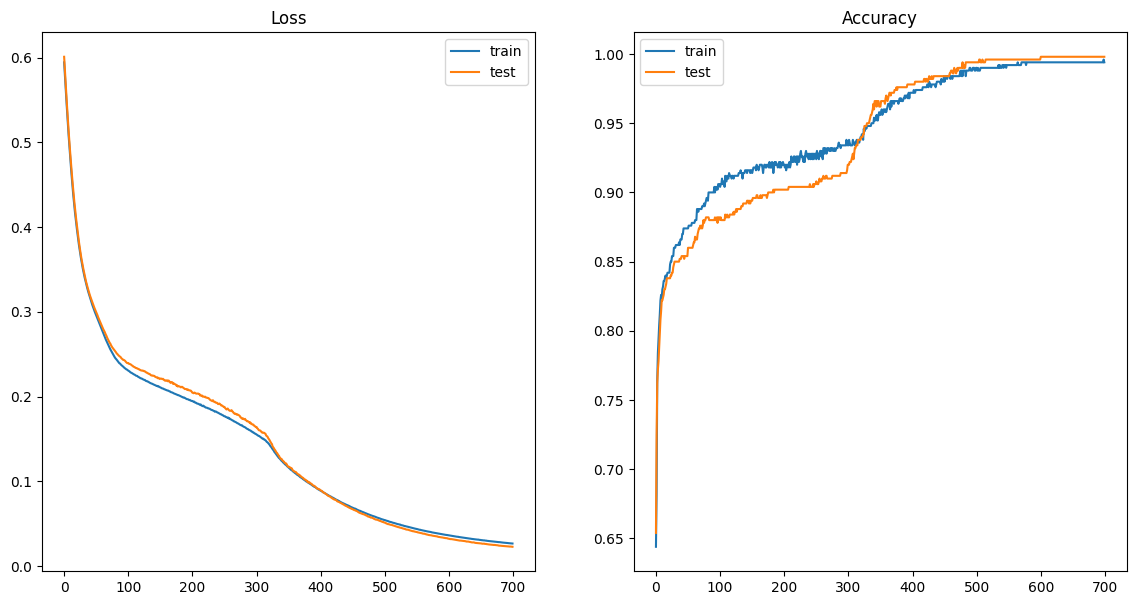

In [28]:
# binary cross entropy:
keras.backend.clear_session()
# Preprocesado de los datos
n_train = 500
train_X, test_X = X[ : n_train, :], X[n_train : , :]
train_y, test_y = y[ : n_train], y[n_train : ]
model = model_make_moons()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=700, verbose=1)
# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [29]:
# Predecir probabilidades para los datos de a adivinar
predic_proba = model.predict(test_X)
# asignamos valores dependiendo de la probabilidad con la clase
predic_clases = (predic_proba >= 0.5).astype(int)
# calculamos entonces cuantos fueron verdaderos y cuantos fueron falsos
valores = predic_clases.flatten() == test_y
V, F = sum(1 for x in valores if x == True), sum(1 for x in valores if x == False)
print(f'El numero de valores que acerto de {len(test_X)} fueron de {V} y los que no fueron de {F}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
El numero de valores que acerto de 500 fueron de 499 y los que no fueron de 1


inicialmente tenia 4 neuronas en la primera capa y 8 en la segunda capa esto dio 478 bueno y 22 malos, lo cambie a la primera capa con 8 y mantuve la segunda, esto dio un resultado de 460 buenos y 40 malos, con 10 y 10 dio un resultado de 490 con 10 malos, esta claro que esto va cambiando si voy corriendo varias veces el codigo, entonces esto varia, pero por lo que veo no baja de 400 buenos, lo cual para ser de 500, no esta nada mal

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [30]:
import numpy as np
import keras
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



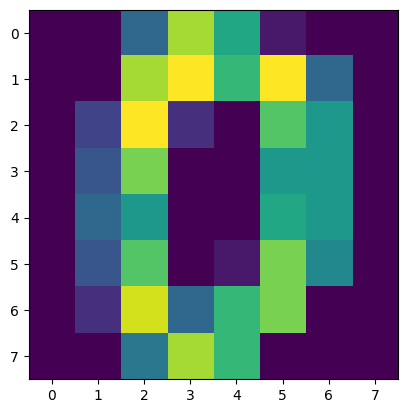

In [31]:
n_class = 6
digits = load_digits(n_class = n_class)
# n_class=6, tomaremos entonces valores de 0 a 5
X, y = digits.data, digits.target
n_samples, n_features = X.shape
plt.imshow(X[0].reshape(8, 8))

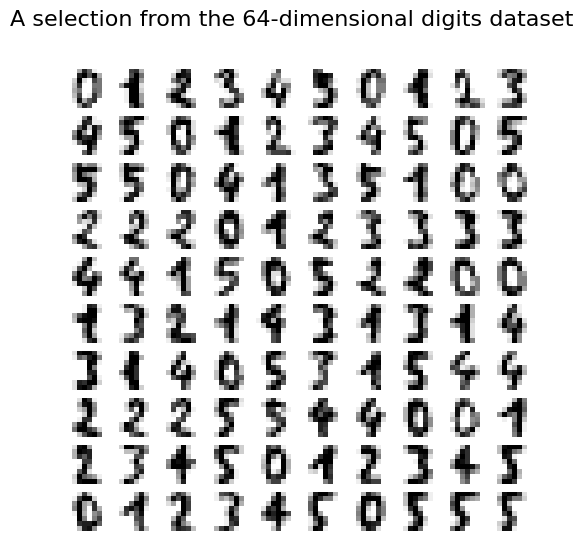

In [32]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Veamos la distribucion de los pixeles, nos damos cuenta que la mayoria son cero, esto es entonces el fondo, y el valor maximo que puede tomar un pixel es 16, vamos a normalizar por este

(array([34.,  3.,  1.,  1.,  0.,  4.,  4.,  4.,  1., 12.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

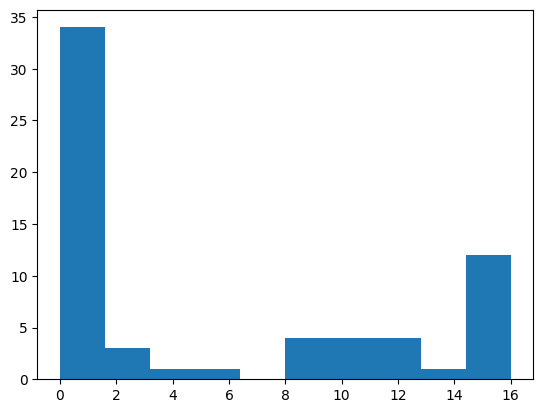

In [33]:
plt.hist(X_train[10].reshape(64))

In [34]:
X_train /= 16 # normalizacion
X_test /= 16 # normalizacion

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((866, 64), (217, 64), (866,), (217,))

In [36]:
# Creación del modelo
def model_hand_written(activation = 'sigmoid', loss='binary_crossentropy', n_class = 6):
  """
  activation = 'sigmoid' es la funcion de activacion de la capa de salida
  loss='binary_crossentropy' es la funcion de perdida
  """
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(34, input_dim=64, activation='relu'))
  # la entrada es el numero entero
  model.add(keras.layers.Dense(34, activation='relu'))
  model.add(keras.layers.Dense(n_class, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

como la funcion de activacion final es sigmoide, usaremos algo que la verdad no tenia conocimiento y es one hot encoding, lo que entiendo es que representaremos la salida de la red neuronal como por ejemplo 5 como [0, 0, 0, 0, 0, 1], el 2 como [0, 0, 1, 0, 0, 0], el 0 como [1, 0, 0, 0, 0, 0], etc. para cada valor que salen, es decir del 0 al 6, esto se hace para poder tener relacion en las dimensiones de los diferentes arrays.

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0767 - loss: 0.6821 - val_accuracy: 0.0691 - val_loss: 0.6682
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1094 - loss: 0.6621 - val_accuracy: 0.0829 - val_loss: 0.6508
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0953 - loss: 0.6467 - val_accuracy: 0.0829 - val_loss: 0.6340
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1201 - loss: 0.6319 - val_accuracy: 0.0876 - val_loss: 0.6176
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1275 - loss: 0.6122 - val_accuracy: 0.1014 - val_loss: 0.6016
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1054 - loss: 0.6020 - val_accuracy: 0.1014 - val_loss: 0.5861
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1251 - loss: 0.5859 - val_accuracy: 0.1060 - val_loss: 0.5711
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1446 - loss: 0.5692 - val_accuracy: 0.1152 - 

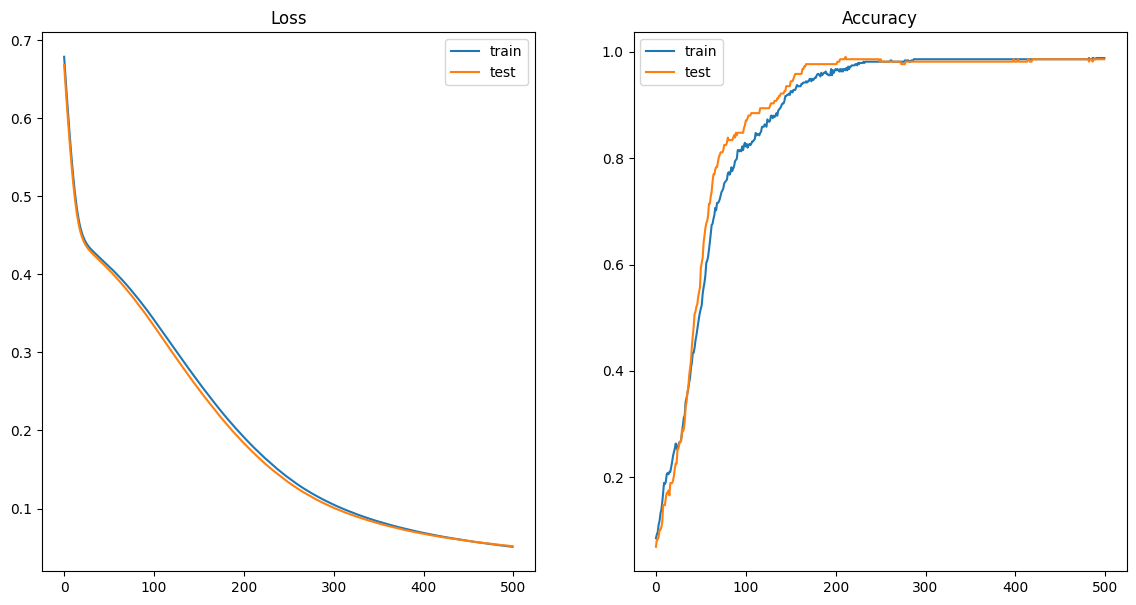

In [37]:
# binary cross entropy:
keras.backend.clear_session()
# Preprocesado de los datos

# en total hay 866 datos de entreamiento tomaremos la mitad de estos para entrenar lo
# y la otra mitad seran para probar el modelo mas abajo
n = int(X_train.shape[0] / 2)
train_y = keras.utils.to_categorical(y_train[ : n], num_classes = n_class)
test_y = keras.utils.to_categorical(y_test, num_classes = n_class)

model = model_hand_written()
history = model.fit(X_train[ : n], train_y, validation_data=(X_test, test_y), epochs=500, verbose=1)
# Evaluación del modelo
_, train_acc = model.evaluate(X_train[ : n], train_y, verbose=0)
_, test_acc = model.evaluate(X_test, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [38]:
Y_train = keras.utils.to_categorical(y_train[ n : ], num_classes = n_class)
loss_accur = model.evaluate(X_train[ n : ], Y_train, verbose = 0)

print(f'Loss: {loss_accur[0]} Accuracy: {loss_accur[1]}')

Loss: 0.06378643959760666 Accuracy: 0.96304851770401


Probemos el modelo:

In [39]:
predict = model.predict(X_train[ n : ])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [40]:
correct = np.count_nonzero(np.argmax(predict, axis = 1) == np.argmax(Y_train, axis = 1))
incorrect = len(predict) - correct
print(f'los correctos son: {correct} y los incorrectos son: {incorrect}')

los correctos son: 417 y los incorrectos son: 16


In [41]:
VF = np.argmax(predict, axis = 1) == np.argmax(Y_train, axis = 1)
indx_F = np.where(VF == False)[0]
indx_V = np.where(VF == True)[0]

In [42]:
np.argmax(predict[indx_V[10]])

3

Veamos algunos buenos

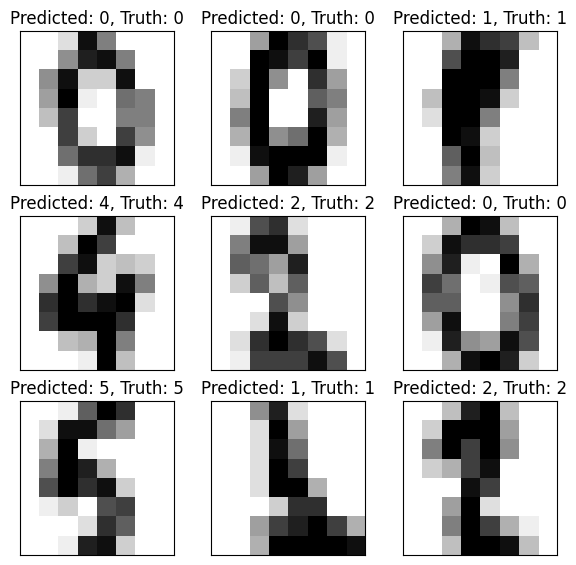

In [47]:
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

for i, correct in enumerate(indx_V[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_train[ n : ][correct].reshape((8, 8)), cmap=plt.cm.binary)
    plt.title(
      "Predicted: {}, Truth: {}".format(np.argmax(predict[correct]),
                                        np.argmax(Y_train[correct])))
    plt.xticks([])
    plt.yticks([])

Veamos algunos errores

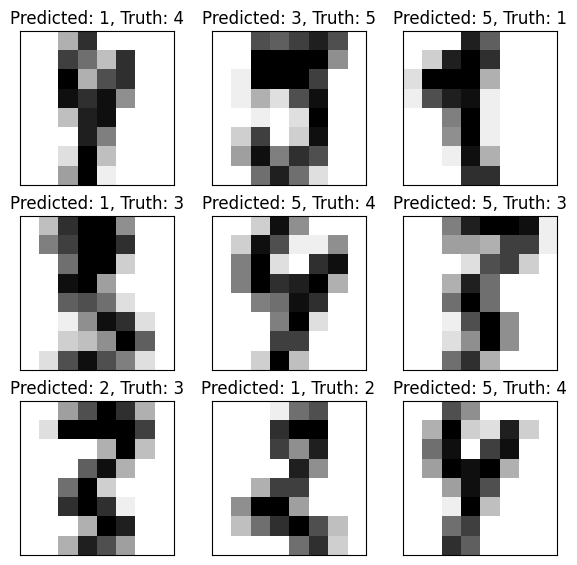

In [46]:
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

for i, correct in enumerate(indx_F[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_train[ n : ][correct].reshape((8, 8)), cmap=plt.cm.binary)
    plt.title(
      "Predicted: {}, Truth: {}".format(np.argmax(predict[correct]),
                                        np.argmax(Y_train[correct])))
    plt.xticks([])
    plt.yticks([])